In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
import re
from nltk.corpus import stopwords

In [12]:
df = pd.read_csv("../data/DataFrame_train.csv").drop("Unnamed: 0", axis=1)

In [13]:
df["is NaN"] = df["text"].apply(lambda x : 1 if type(x) == float else 0)

In [14]:
n = len(df)

n_nan = df["is NaN"].sum()
ratio_nan = n_nan/n

n_true = df["label"].sum()
ratio_true = n_true/n
n_true_nan = df[df["is NaN"]==1]["label"].sum()
ratio_true_nan = n_true_nan/n_nan

title = ". train length : {}\n".format(n)+\
        ". number of label==1 : {} i.e. {:.1f}% of dataset\n".format(n_true,ratio_true*100)+\
        ". number of NaNs : {} i.e. {:.1f}%\n".format(n_nan,ratio_nan*100)+\
        ". among NaNs - number of label==1 : {} i.e. {:.1f}% of NaNs".format(n_true_nan,ratio_true_nan*100)

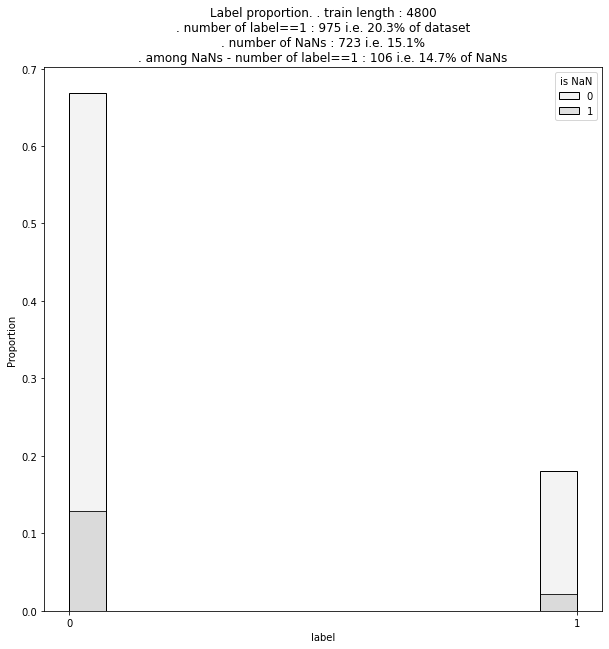

In [15]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="label", hue="is NaN", stat='proportion', palette="Greys", alpha=0.2)
plt.title("Label proportion. "+title)
plt.xticks([0,1],[0,1])
plt.savefig("../images/label_proportion.jpg")
plt.show()

In [16]:
df.dropna(inplace=True)
df.drop(["id", "is NaN"], axis=1, inplace=True)
df.head()

,label,text
0,0,Showers continued throughout the week in\nthe ...
1,0,Standard Oil Co and BP North America\nInc said...
2,0,Texas Commerce Bancshares Inc's Texas\nCommerc...
3,0,BankAmerica Corp is not under\npressure to act...
4,0,The U.S. Agriculture Department\nreported the ...


In [180]:
def get_labels_word_frequency(df, stop_words, k=30):
    df["text_lower"] = df["text"].apply(lambda x : x.lower())
    labels_list = [" ".join(df[df["label"]==i]["text_lower"].values.tolist()) for i in (0,1)]
    labels_list = [re.findall(r"\b[a-zA-Z]+\b", label_list) for label_list in labels_list]
    labels_words = [[word for word in label if word not in stop_words] for label in labels_list]
    del labels_list
    units = [1/len(label_word) for label_word in labels_words]
    count = [dict() for i in (0,1)]
    for i in (0,1):
        for word in labels_words[i]:
            if word in count[i].keys() :
                count[i][word] += units[0]
            else :
                count[i][word] = units[0]
    df_count_label_0 = pd.DataFrame(columns=["word","count"], data=zip(list(count[0].keys()), list(count[0].values())))
    df_count_label_0.sort_values(by="count",ascending=False,ignore_index=True,inplace=True)
    df_count_label_1 = pd.DataFrame(columns=["word","count"], data=zip(list(count[1].keys()), list(count[1].values())))
    df_count_label_1.sort_values(by="count",ascending=False,ignore_index=True,inplace=True)

    df_count_label_0 = df_count_label_0.head(k)
    df_count_label_1 = df_count_label_1.head(k)
    df_count_label_0["label"] = 0
    df_count_label_1["label"] = 1
    df_count = pd.concat([df_count_label_0,df_count_label_1], ignore_index=True)
    df_count.sort_values(by="word", ignore_index=True, inplace=True)

    return df_count, df_count_label_0, df_count_label_1

In [212]:
def plot_word_freq_by_label(df_count_label_0, df_count_label_1, save=True):
    y_lim = [0, 1.05*max(df_count_label_0["count"].values[0],df_count_label_1["count"].values[0])]

    plt.figure(figsize=(20,10))

    plt.subplot(2,1,2)
    sns.barplot(data=df_count_label_1,
                x="word",
                y="count",
                palette="rainbow")
    plt.xticks(rotation=60)
    plt.ylim(y_lim)
    plt.ylabel("Proportion - label = 1")
    plt.xlabel("")

    plt.subplot(2,1,1)
    sns.barplot(data=df_count_label_0,
                x="word",
                y="count",
                palette="rainbow")
    plt.xticks(rotation=60)
    plt.ylim(y_lim)
    plt.ylabel("Proportion - label = 0")
    plt.xlabel("")

    plt.suptitle(f"Proportion of {len(df_count_label_0)} most frequent words.")
    plt.tight_layout()
    if save:
        plt.savefig(f"../images/proportion_of_{len(df_count_label_0)}_most_frequent_words.jpg")
    plt.show()

def plot_word_frq_compare(df_count, save=True):
    plt.figure(figsize=(20,5))
    sns.barplot(data=df_count,
                x="word",
                y="count",
                hue="label",
                palette="rainbow")
    plt.title(f"Comparison - Proportion of {len(df_count)//2} most frequent words of each label.\n"
              f"Minimum frequency shown {df_count['count'].min():.6f}")
    plt.ylabel("Proportion")
    plt.xlabel("")
    plt.xticks(rotation=60)
    plt.tight_layout()
    if save:
        plt.savefig(f"../images/comparison-proportion_of_{len(df_count)//2}_most_frequent_words_of_each_label.jpg")
    plt.show()

In [217]:
df_count, df_count_label_0, df_count_label_1 = get_labels_word_frequency(df, set(stopwords.words("english")), k=30)

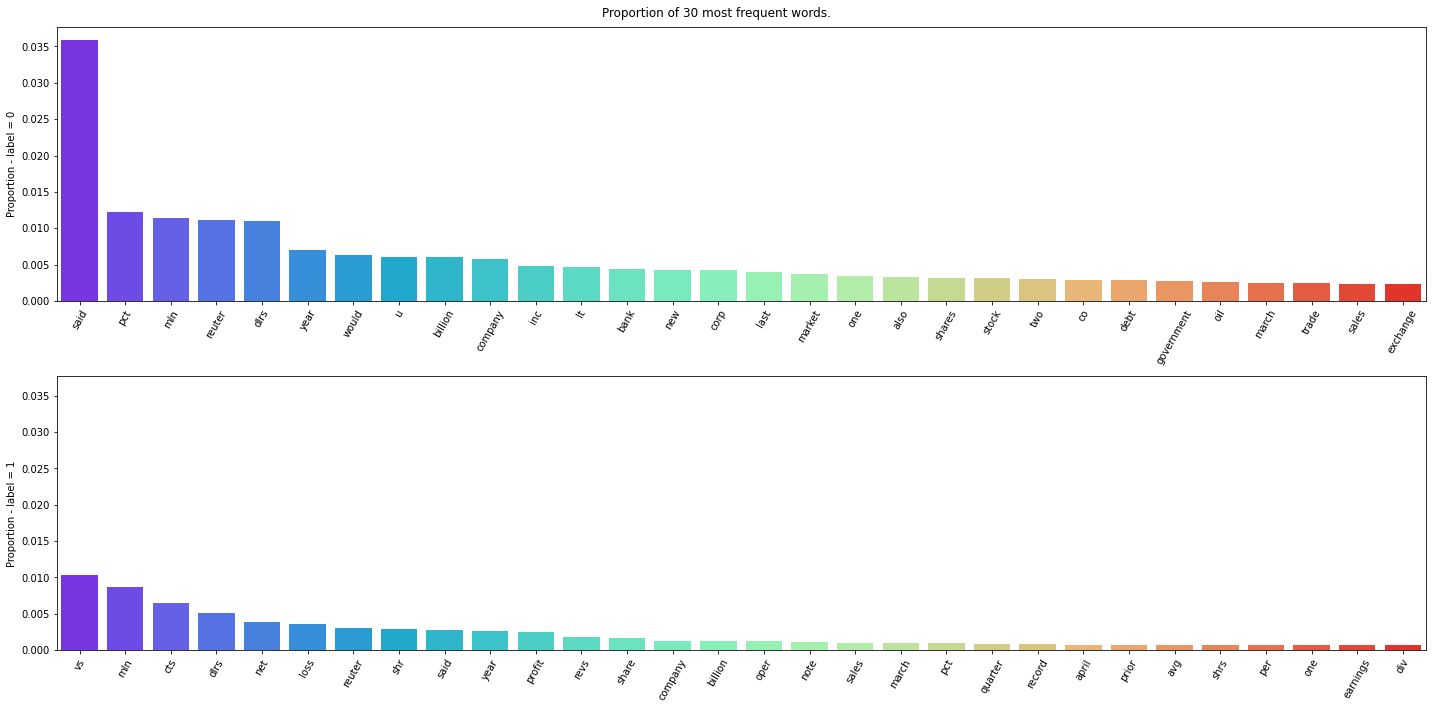

In [218]:
plot_word_freq_by_label(df_count_label_0,df_count_label_1)

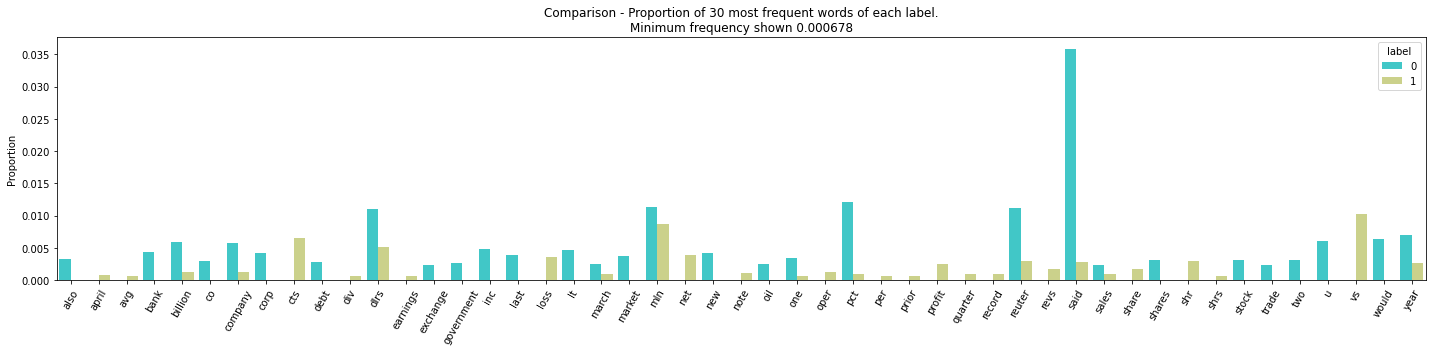

In [219]:
plot_word_frq_compare(df_count)